In [67]:
from __future__ import absolute_import, division, print_function

In [68]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
rng = np.random

In [69]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50
threshold = 0.01

In [81]:
# Training Data.
X1 = np.random.randn(100).astype(np.float32)
X2 = np.random.randn(100).astype(np.float32)
Y = X1 + X2 * 3 + 1.5

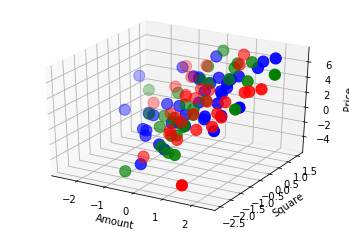

In [82]:
# Training Data
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x1_data = np.random.randn(100).astype(np.float32)
x2_data = np.random.randn(100).astype(np.float32)
y_data = x1_data + 3 * x2_data + 1.5 
x, y, z = x1_data, x2_data, y_data
ax = plt.subplot(111, projection='3d')
ax.scatter(x[:30], y[:30], z[:30], c='g',s = 125) 
ax.scatter(x[30:60], y[30:60], z[30:60], c='r',s = 125)
ax.scatter(x[60:100], y[60:100], z[60:100], c='b',s = 125)
ax.set_zlabel('Price')
ax.set_ylabel('Square')
ax.set_xlabel('Amount')
plt.show()

In [83]:
weight1 = tf.Variable(1.)
weight2 = tf.Variable(1.)
bias = tf.Variable(1.)
x1_ = tf.placeholder(tf.float32)
x2_ = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)
# construct model: Y = weight1 * X1 + weight2 * X2 + Bias
y_model = tf.add(tf.add(tf.multiply(weight1, x1_), tf.multiply(weight2, x2_)), bias)

In [84]:
# Loss function:
loss = tf.reduce_mean(tf.pow((y_model - y_), 2))

In [85]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Start training!
Linear Regression Model：
Y = 1.198806 * X1 + 1.681282 * X2 + 1.061424 


/Users/hongling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'camp'


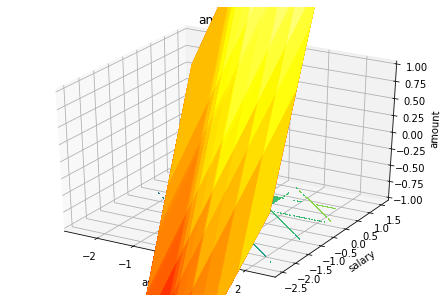

Linear Regression Model：
Y = 1.182052 * X1 + 1.736055 * X2 + 1.131548 


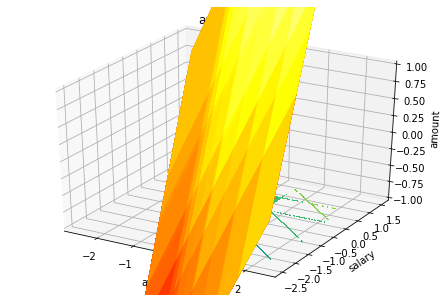

Linear Regression Model：
Y = 1.130311 * X1 + 1.808405 * X2 + 1.236649 


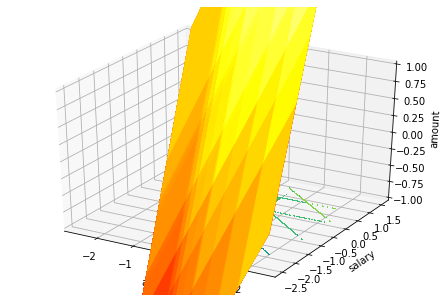

Linear Regression Model：
Y = 1.104845 * X1 + 2.196385 * X2 + 1.227442 


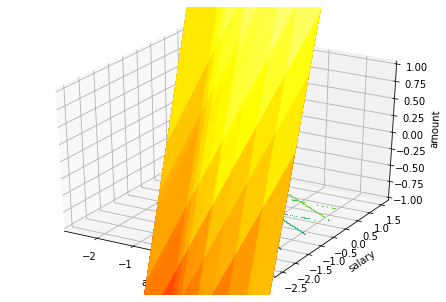

Linear Regression Model：
Y = 1.088159 * X1 + 2.310630 * X2 + 1.270361 


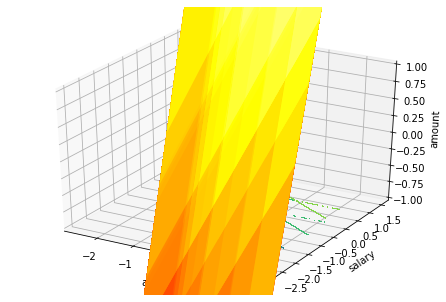

Linear Regression Model：
Y = 1.077114 * X1 + 2.313291 * X2 + 1.265219 


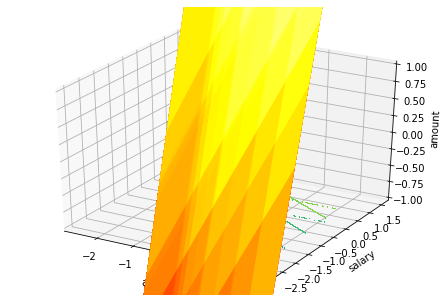

In [86]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Start training!")
    flag = 1
    while(flag):
        for (x,y) in zip(zip(x1_data, x2_data), y_data):
            sess.run(train_op, feed_dict = {x1_ : x[0],x2_ : x[1],y_ : y})
            if sess.run(loss, feed_dict = {x1_ : x[0],x2_ : x[1],y_ : y}) < threshold:
                flag = 0
                w1 = sess.run(weight1)
                w2 = sess.run(weight2)
                b = sess.run(bias)
                print('Linear Regression Model：')
                print("Y = %f * X1 + %f * X2 + %f " % (w1, w2, b))
                fig = plt.figure()
                ax = Axes3D(fig)
                X, Y = np.meshgrid(x1_data, x2_data)
                Z = sess.run(weight1) * (X) + sess.run(weight2) * (Y) + sess.run(bias)
                ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.cm.hot)
                ax.contourf(X, Y, Z, zdir = 'z', offset = -1, camp = plt.cm.hot)
                ax.set_title('analysis')
                ax.set_ylabel('salary')
                ax.set_xlabel('age')
                ax.set_zlabel('amount')
                ax.set_zlim(-1, 1)
                plt.show()

Trained model: Y = 1.077114 * X1 + 2.313291 * X2 + 1.265219 
    
Original model: Y = X1 + 2 * X2 + 1.5